___

<a href='http://www.pieriandata.com'><img src='Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>

# Facebook Prophet Seasonality of Airline Passengers Time Series Data

**By Drew Sims**

The following project was an exercise project given by Pierian Data in the Python for Time-series Data Science Bootcamp

**The goal of this project is to determine whether a multiplicative or additive model would be better in determining seasonality upon trends in the airline passengers dataset**

**The Steps are as followed:**

**1.)** Import Libraries

**2.)** Import CSV Data

**3.)** Feature Engineer Date Column

**4.)** Create Prophet Model

**5.)** Visualize Prophet Model

**6.)** Explore Multiplicativeness of Seasonality

# 1.) Import Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

# 2.) Import CSV Data

In [2]:
# read in csv data

df = pd.read_csv('..//Data/airline_passengers.csv')

In [3]:
# Visualize dataframe

df.head(5)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# 3.) Feature Engineer Date Column

**Sometimes growth in trend or changes in seasonality can be additive or multiplicative (linear and study or if rate of cahnge is changing itself**

In [4]:
# change column names to correspond to Facebook Prophet's names
# change date data into datetime64 objects

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

# 4.) Create Prophet Model

In [5]:
# Create Instance of Prophet
# Fit the Prophet Model
# Creates dates dataframe with dates for the training data length extended by however many periods you have
# Forecast future data (fill empty dates dataframe from 'future' with corresponding predicted values)

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 5.) Visualize Prophet Model 

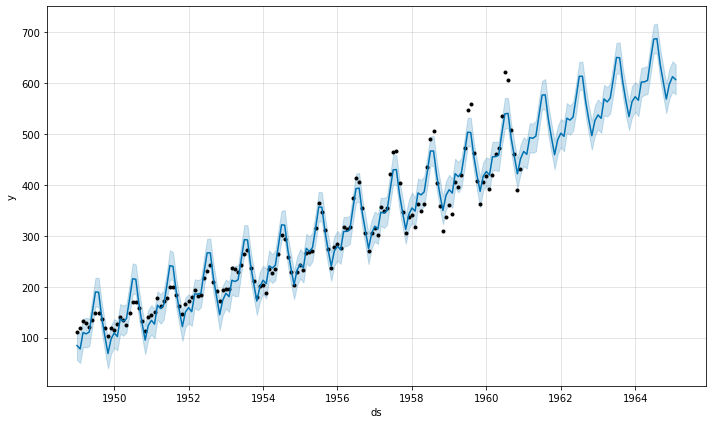

In [6]:
fig = m.plot(forecast)

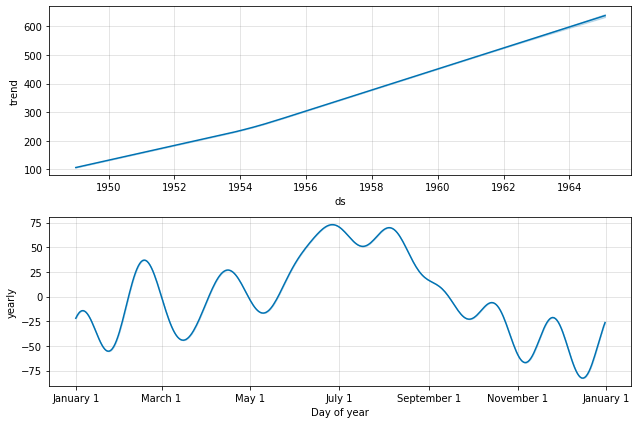

In [8]:
# The trend and yearly seasonality can be observed
# The time series is indicative of a yearly cycle

fig = m.plot_components(forecast);

**The seasonlity grows with the trend of the data making it multiplicative seasonality**

# 6.) Explore Multiplicativeness of Seasonality

In [10]:
# import change point libraries

from fbprophet.plot import add_changepoints_to_plot

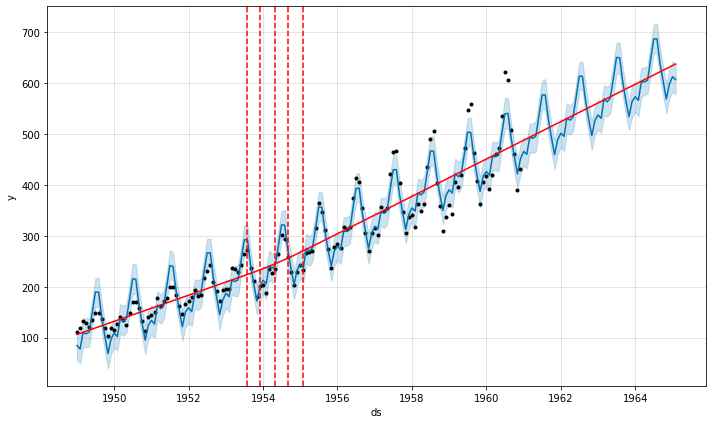

In [13]:
# Visualize change points of trends

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

In [14]:
# Create Instance of Prophet
# Fit the Prophet Model
# Creates dates dataframe with dates for the training data length extended by however many periods you have
# Forecast future data (fill empty dates dataframe from 'future' with corresponding predicted values)

m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


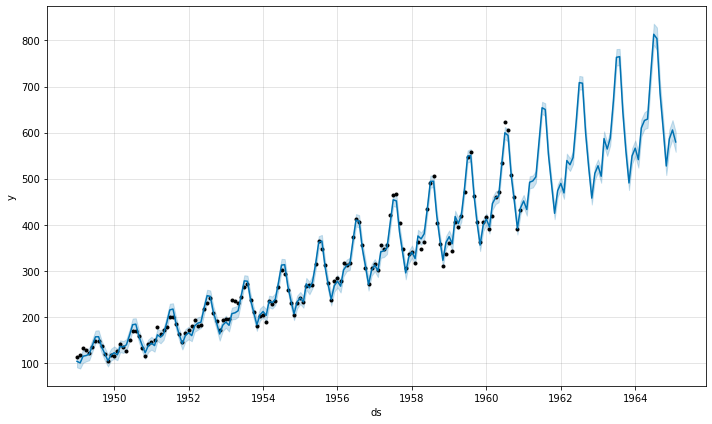

In [15]:
fig = m.plot(forecast)

**The multiplicative model predicts the model much better than the original Facebook Prophet model. The seasonality component of the trend grows larger and larger as time goes on**

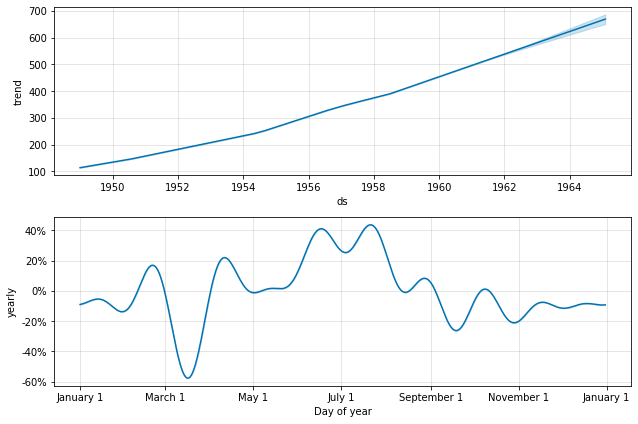

In [16]:
# Can see yearly seasonality and the trend of the dataset

fig = m.plot_components(forecast)